In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import statsmodels.api as sm

Wczytaj dane opisujące ilość plam słonecznych w okresie od 1700 do 2008 r.

In [2]:
# tutaj wrzuciliśmy do analizy cały zbiór do train, po czym wykonaliśmy test na fragmencie zbioru
series = Series.from_csv('./sunspots.csv', header=0)
series.head()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


YEAR
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
Name: SUNACTIVITY, dtype: float64

In [3]:
series.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
series.index

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq=None)

# Zadanie
Narysuj szereg czasowy

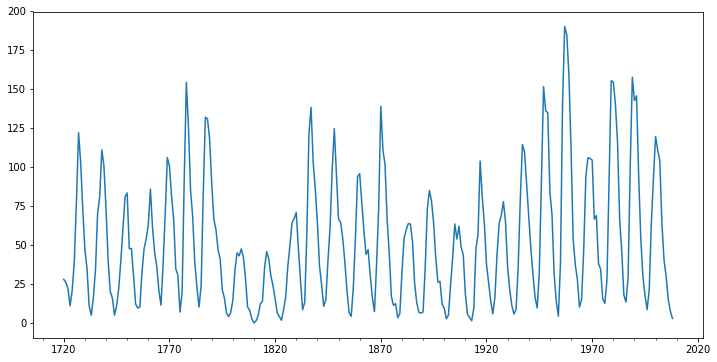

In [4]:
plt.figure(figsize=(12,6));
series.loc['1720':].plot()
plt.show()

### Zanim zdecydujemy, który model ma być używany, musimy przyjrzeć się autokorelacji.

Poleca się stosowanie następujących zasad:

<b>Zasada 1:</b> Jeśli ACF wykazuje rozkłady wykładnicze, a PACF ma skok przy opóźnieniu 1 oraz nie ma korelacji dla innych opóźnień to użyj jednego parametru autoregresji (p).

<b>Zasada 2:</b> Jeśli ACF ma kształt sinusoidy lub powtarzający się wzorzec w kształcie funkcji wykładniczej, a PACF ma skoki przy opóźnieniach 1 i 2 oraz nie ma korelacji dla innych opóźnień to użyj parametrów autoregresji (p) równej dwa.

<b>Zasada 3:</b> Jeśli ACF ma skok w punkcie 1 i nie ma korelacji z innymi opóźnieniami, a PACF maleje wykładniczo to użyj parametru średniej ruchomej (q) równego jeden.

<b>Zasada 4:</b> Jeśli ACF ma skoki przy opóźnieniach 1 i 2 i nie ma korelacji z innymi opóźnieniami, a PACF ma kształt sinusoidy lub zespół rozkładów wykładniczych to użyj parametrów średniej ruchomej (q) równej dwa.

<b>Zasada 5:</b> Jeśli ACF i PACF wygląda jak funkcja wykładnicza zaczynająca się od opóźnienia 1 to użyj parametru autoregresji (p =1) i parametru średniej ruchu (q=1).



# Zadanie
Narysuj funkcję:
- ACF
- PACF

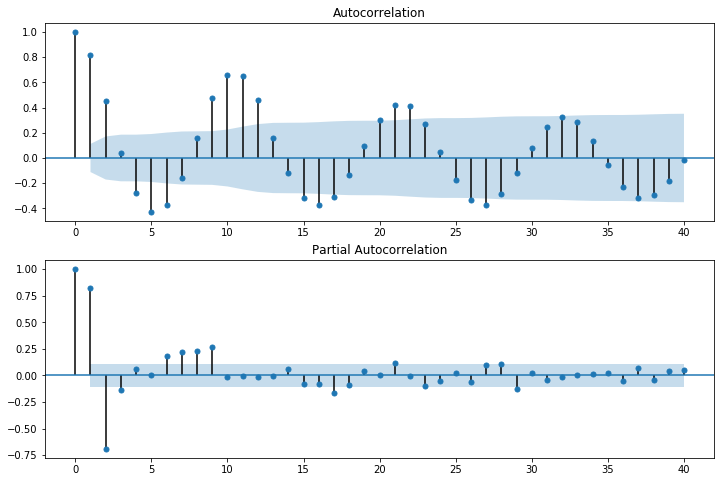

In [5]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series.values, lags=40, ax=ax2)
plt.show()


### Statystyka Durbin-Watson

- Innym popularnym testem korelacji szeregowej jest statystyka Durbin-Watson. Statystyczna wartość DW mieści się w przedziale 0-4. 
- Dodatnia korelacja jest związana z wartościami DW poniżej 2 a ujemna korelacja z wartościami DW powyżej 2.
- Wartość statystyki Durbin-Watson wynosi blisko 2, jeśli błędy nie są ze sobą powiązane.

# Zadanie
Wykonaj test Durbina Watsona

In [6]:
sm.stats.durbin_watson(series)

0.13952892659903304

# AR(2) = ARMA(2,0)

Korzystając z zasady 2, najpierw spróbujemy model ARMA(2,0) z dwoma warunkami autoregresji i bez średnich kroczących.

In [7]:
arma_mod20 = sm.tsa.ARMA(series, (2,0)).fit()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/kodolamacz/anac

Wypiszmy parametry modelu

In [8]:
print(arma_mod20.params)

const                49.659554
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


Teraz obliczamy Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) oraz Hannan-Quinn Information Criterion (HQIC). Naszym celem jest wybranie modelu, który minimalizuje (AIC, BIC, HQIC).

In [9]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.636338066193 2637.5697031737836 2628.606725911439


# Analiza Residuals

Test Durbin-Watson nie wykazuje autokorelacji.

In [10]:
sm.stats.durbin_watson(arma_mod20.resid.values)

2.145826901840096

Możemy narysować błędy (Residuals)

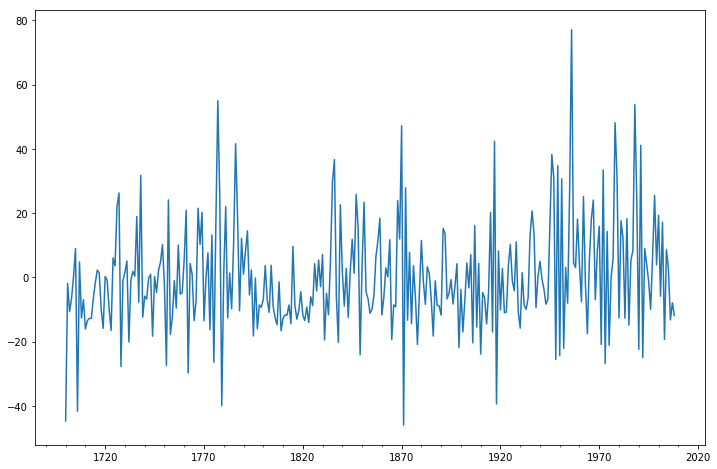

In [11]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);
plt.show()
# same opóźnienia, powinny mieć rozkłąd normalny

Możemy sprawdzić założeni o rozkładzie normalnym błędów.

In [12]:
import scipy.stats as stats
resid20 = arma_mod20.resid
stats.normaltest(resid20)
# sprawdzamy czy rozkład normalny. odp nie jest normalny

NormaltestResult(statistic=41.735978470764536, pvalue=8.652615927238322e-10)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


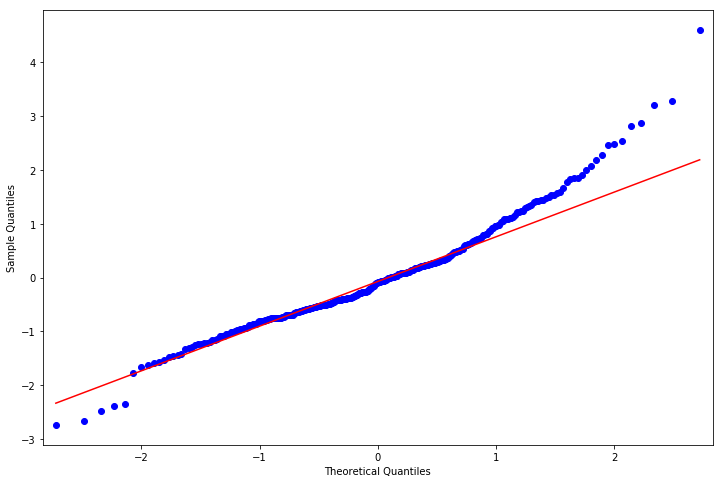

In [13]:
from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)
plt.show()
# jakby był rozkład normalny to niebieski powinien się pokryc z czerwonym

Możemy sprawdzić autokorelację dla błędów

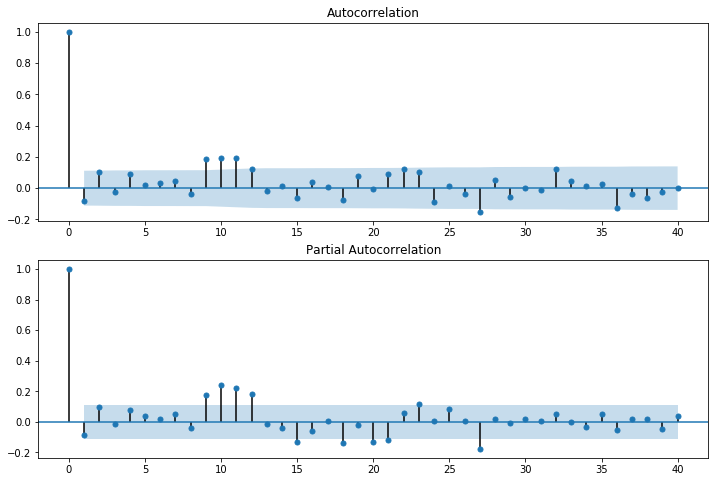

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20.values, lags=40, ax=ax2)
plt.show()
# mój model bedzie dobry jesli wykorzysta całą autokorelacje z danych, wszystkie kropki schowane w pasku, 
# jak wystaje to trzeba inaczej dobrać pasek, najlepiej się jednak zatrzymać jak coś tam jeszcze wystaje

Możemy wypisać pełna informację o modelu:

In [15]:
print(arma_mod20.summary())
# ponieważ jest to zwykła regresja, nie ma R2, Log LIkelihood im większe tym lepiej
# AIC i BIC zanim sie odbije (cyt. ja i moja żona)
# P(z) mówi jak bardzo jest istotne, im większa liczba to znaczy ze "przejechalem"

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(2, 0)   Log Likelihood               -1307.318
Method:                       css-mle   S.D. of innovations             16.576
Date:                Sun, 03 Feb 2019   AIC                           2622.636
Time:                        14:20:18   BIC                           2637.570
Sample:                    12-31-1700   HQIC                          2628.607
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.6596      3.165     15.689      0.000      43.456      55.863
ar.L1.SUNACTIVITY     1.3907      0.041     33.954      0.000       1.310       1.471
ar.L2.SUNACTIVITY    -0.

## Wykonajmy predykcję 

In [16]:
# można predykować od daty do daty
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
print(predict_sunspots20)

1990-12-31    164.966862
1991-12-31    135.687644
1992-12-31     89.897721
1993-12-31     46.380527
1994-12-31     17.392712
1995-12-31      7.045328
1996-12-31     12.615854
1997-12-31     27.487447
1998-12-31     44.333012
1999-12-31     57.519242
2000-12-31     64.257378
2001-12-31     64.548148
2002-12-31     60.312821
2003-12-31     54.222725
2004-12-31     48.669821
2005-12-31     45.141108
2006-12-31     44.057453
2007-12-31     44.980232
2008-12-31     47.009673
2009-12-31     49.196529
2010-12-31     50.840277
2011-12-31     51.620359
2012-12-31     51.573348
Freq: A-DEC, dtype: float64


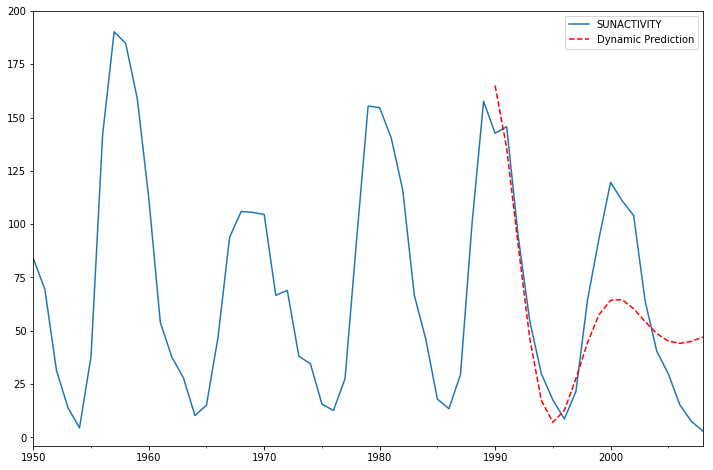

In [17]:
ax = series.loc['1950':].plot(figsize=(12,8))
predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()
# sfittowany model AR2

Możemy policzyć jeszcze błąd:

In [18]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [19]:
print("MFE = ", mean_forecast_err(series, predict_sunspots20))
print ("MAE = ", mean_absolute_err(series, predict_sunspots20))

MFE =  4.730225928780894
MAE =  0.13468268969371655


# Zadanie
Naucz model ARMA(3,0) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

In [24]:
arma_mod30 = sm.tsa.ARMA(series, (3,0)).fit()
print(arma_mod30.params)
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/kodolamacz/anac

const                49.750030
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129649
dtype: float64
2619.4036286974306 2638.0703350819194 2626.866613503988


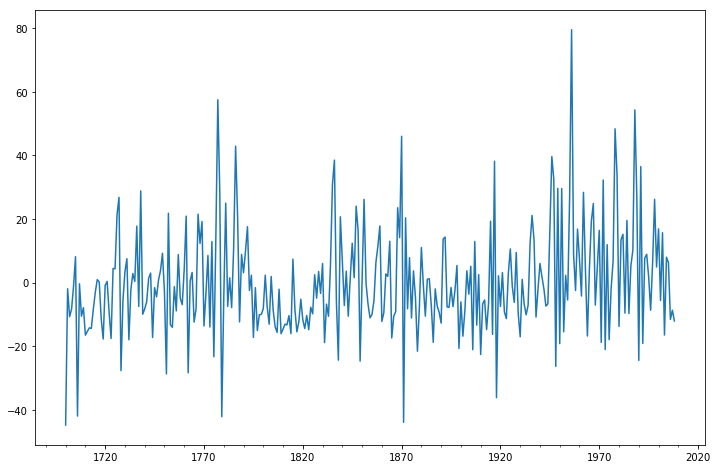

In [25]:
sm.stats.durbin_watson(arma_mod30.resid.values)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);
plt.show()

In [26]:
import scipy.stats as stats
resid30 = arma_mod30.resid
stats.normaltest(resid30)

NormaltestResult(statistic=49.8450291299756, pvalue=1.5006846809729493e-11)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


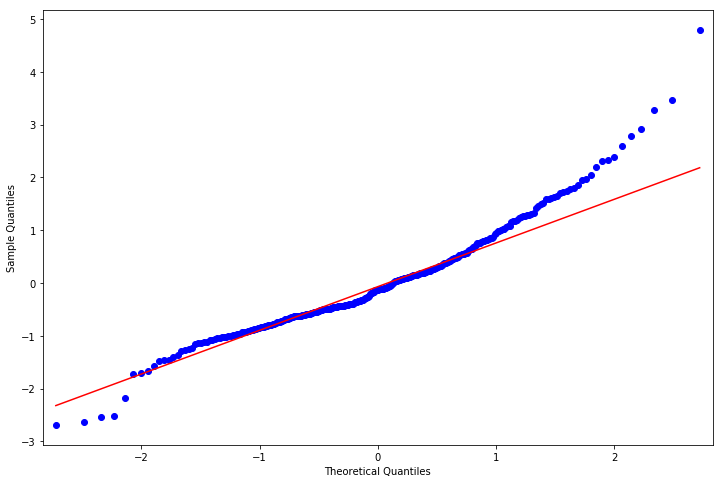

In [27]:
from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid30, line='q', ax=ax, fit=True)
plt.show()


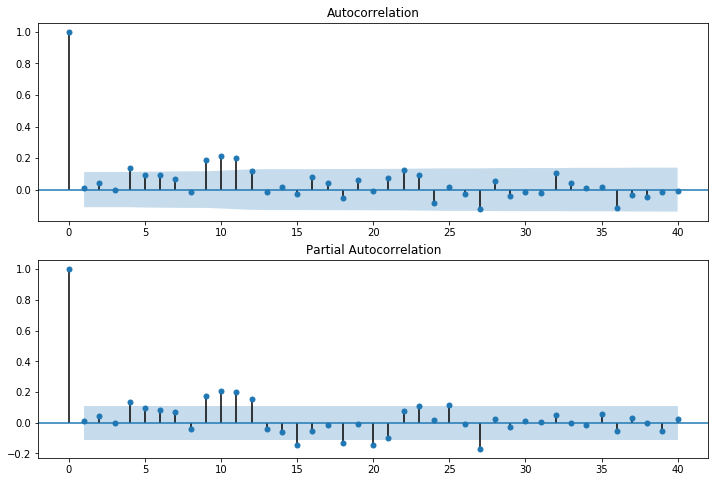

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(3, 0)   Log Likelihood               -1304.702
Method:                       css-mle   S.D. of innovations             16.435
Date:                Sun, 03 Feb 2019   AIC                           2619.404
Time:                        14:27:24   BIC                           2638.070
Sample:                    12-31-1700   HQIC                          2626.867
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.7500      2.778     17.907      0.000      44.305      55.195
ar.L1.SUNACTIVITY     1.3008      0.056     23.079      0.000       1.190       1.411
ar.L2.SUNACTIVITY    -0.

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid30.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid30.values, lags=40, ax=ax2)
plt.show()

print(arma_mod30.summary())

predict_sunspots30 = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots30)

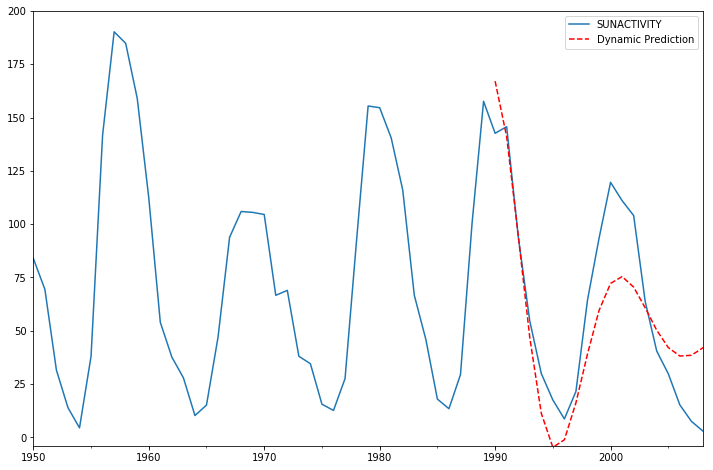

MFE =  5.636860732387419
MAE =  -0.14116096489600377


In [30]:
ax = series.loc['1950':].plot(figsize=(12,8))
predict_sunspots30.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

print("MFE = ", mean_forecast_err(series, predict_sunspots30))
print ("MAE = ", mean_absolute_err(series, predict_sunspots30))

# Zadanie
Naucz model ARMA(2,1) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


const                49.749253
ar.L1.SUNACTIVITY     1.470738
ar.L2.SUNACTIVITY    -0.755121
ma.L1.SUNACTIVITY    -0.153691
dtype: float64
2620.2771915569656 2638.9438979414545 2627.740176363523


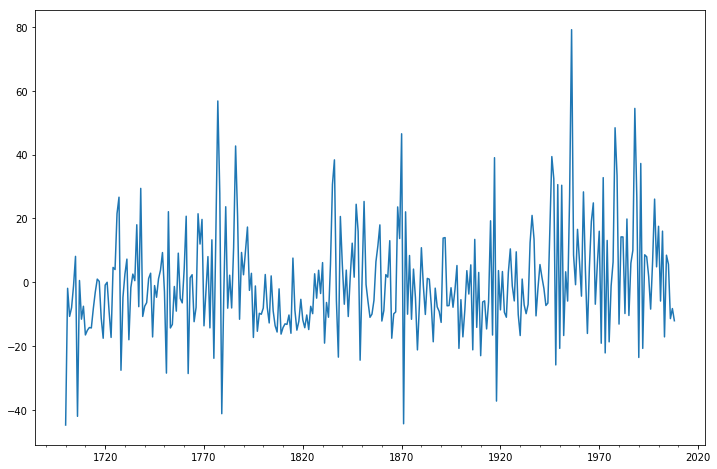

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


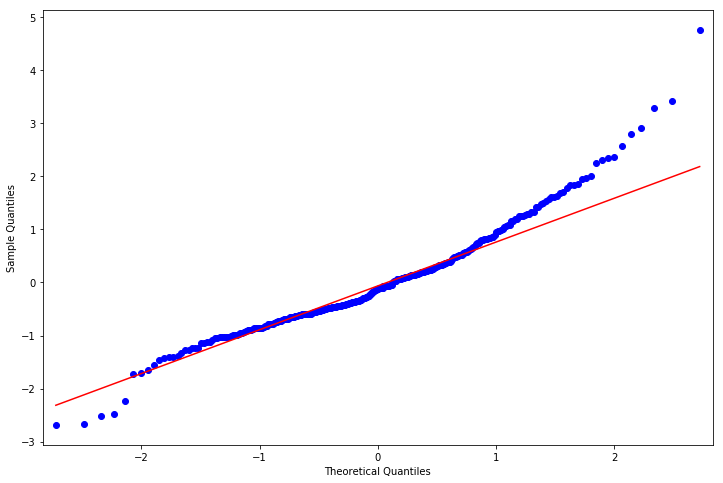

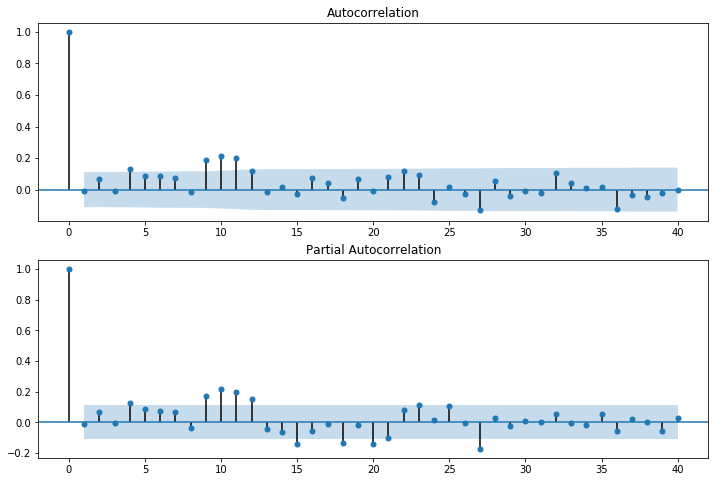

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(2, 1)   Log Likelihood               -1305.139
Method:                       css-mle   S.D. of innovations             16.458
Date:                Sun, 03 Feb 2019   AIC                           2620.277
Time:                        14:33:35   BIC                           2638.944
Sample:                    12-31-1700   HQIC                          2627.740
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.7493      2.790     17.832      0.000      44.281      55.217
ar.L1.SUNACTIVITY     1.4707      0.050     29.566      0.000       1.373       1.568
ar.L2.SUNACTIVITY    -0.

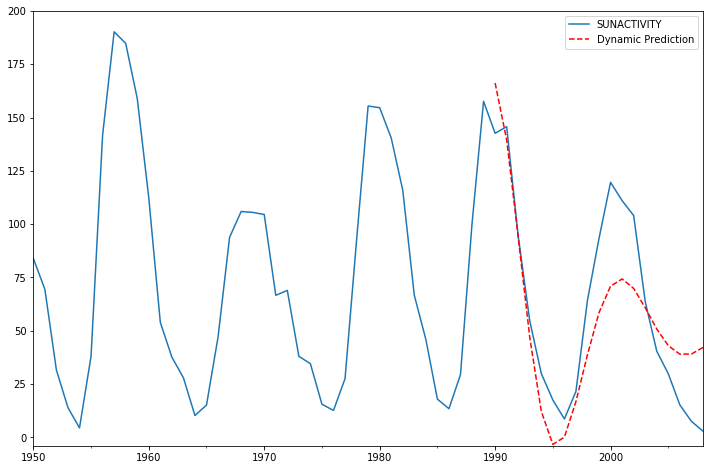

MFE =  5.651893784365747
MAE =  4.819218563885133


In [31]:
arma_mod21 = sm.tsa.ARMA(series, (2,1)).fit()
print(arma_mod21.params)
print(arma_mod21.aic, arma_mod21.bic, arma_mod21.hqic)

sm.stats.durbin_watson(arma_mod21.resid.values)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod21.resid.plot(ax=ax);
plt.show()

import scipy.stats as stats
resid21 = arma_mod21.resid
stats.normaltest(resid21)

from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid21, line='q', ax=ax, fit=True)
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid21.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid21.values, lags=40, ax=ax2)
plt.show()

print(arma_mod21.summary())

predict_sunspots21 = arma_mod21.predict('1990', '2012', dynamic=True)
print(predict_sunspots21)

ax = series.loc['1950':].plot(figsize=(12,8))
predict_sunspots21.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

print("MFE = ", mean_forecast_err(series, predict_sunspots21))
print ("MAE = ", mean_absolute_err(series, predict_sunspots21))

# Zadanie
Naucz model ARMA(2,3) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

# Zadanie
Naucz model ARMA(3,2) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


const                48.486967
ar.L1.SUNACTIVITY     2.560638
ar.L2.SUNACTIVITY    -2.471096
ar.L3.SUNACTIVITY     0.892055
ma.L1.SUNACTIVITY    -1.518370
ma.L2.SUNACTIVITY     0.663742
dtype: float64
2581.572298962148 2607.705687900432 2592.020477691329


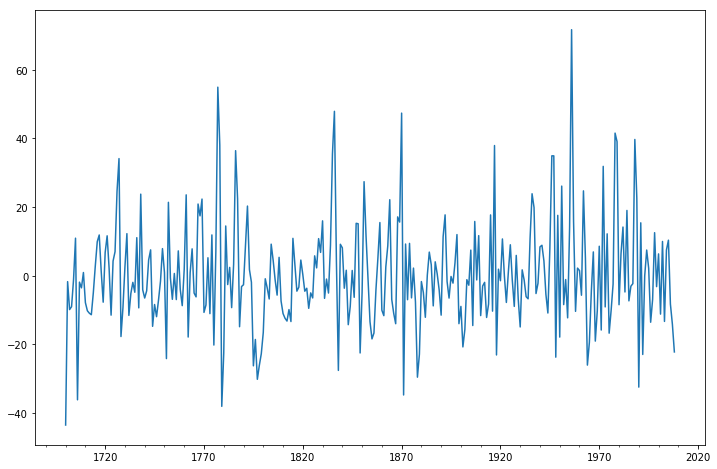

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


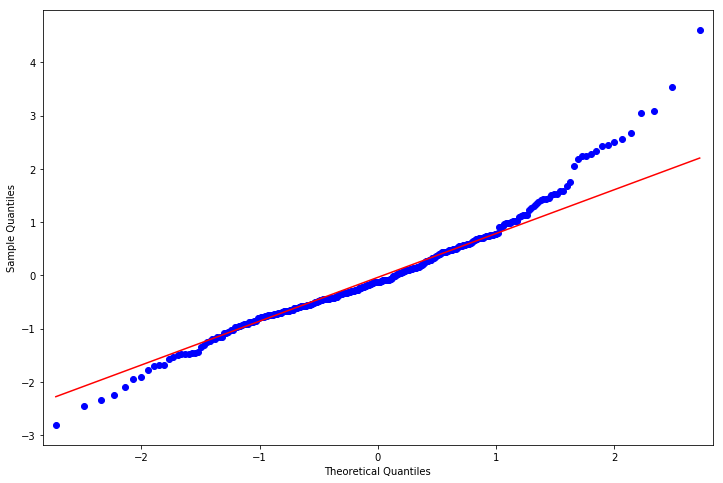

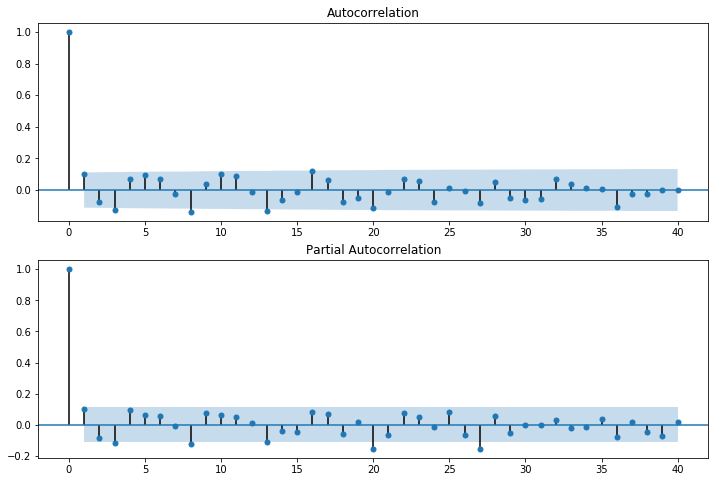

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(3, 2)   Log Likelihood               -1283.786
Method:                       css-mle   S.D. of innovations             15.328
Date:                Sun, 03 Feb 2019   AIC                           2581.572
Time:                        14:36:45   BIC                           2607.706
Sample:                    12-31-1700   HQIC                          2592.020
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                48.4870      6.613      7.332      0.000      35.526      61.448
ar.L1.SUNACTIVITY     2.5606      0.031     83.854      0.000       2.501       2.620
ar.L2.SUNACTIVITY    -2.

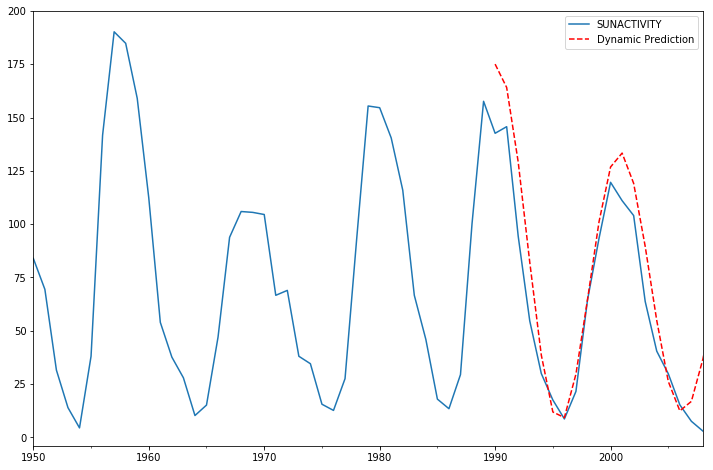

MFE =  -13.39493828352757
MAE =  0.3574358743517115


In [32]:
arma_mod32 = sm.tsa.ARMA(series, (3,2)).fit()
print(arma_mod32.params)
print(arma_mod32.aic, arma_mod32.bic, arma_mod32.hqic)

sm.stats.durbin_watson(arma_mod32.resid.values)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod32.resid.plot(ax=ax);
plt.show()

import scipy.stats as stats
resid32 = arma_mod32.resid
stats.normaltest(resid32)

from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid32, line='q', ax=ax, fit=True)
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid32.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid32.values, lags=40, ax=ax2)
plt.show()

print(arma_mod32.summary())

predict_sunspots32 = arma_mod32.predict('1990', '2012', dynamic=True)
print(predict_sunspots32)

ax = series.loc['1950':].plot(figsize=(12,8))
predict_sunspots32.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

print("MFE = ", mean_forecast_err(series, predict_sunspots32))
print ("MAE = ", mean_absolute_err(series, predict_sunspots32))
# dążymy do tego, żeby czerwony wykres jak najbardziej pokrył sie z niebieskim

# Wnioski

Oczywiście model 5 minimalizuje (aic, bic, hqic). 

Model 1 ma jednak najmniejszy MFE i MAE. 

Pod względem konsystencji model 2 minimalizuje AIC, BIC, HQIC, MFE i MAE. 

Również ARIMA(3,0,2) ma najmniejsze wartości AIC, BIC i HQIC, choć widać nadmieny overfiting. 

Zauważ, że ARIMA(2,0,3) i ARMA(2,3) to te same modele.

# Można sprawdzać wiele modeli:

In [20]:
arma_mod10 = sm.tsa.ARMA(series, (1,0)).fit()
arma_mod20 = sm.tsa.ARMA(series, (2,0)).fit()
arma_mod30 = sm.tsa.ARMA(series, (3,0)).fit()
arma_mod40 = sm.tsa.ARMA(series, (2,1)).fit()
arma_mod50 = sm.tsa.ARMA(series, (2,3)).fit()
arima_mod1 = sm.tsa.ARIMA(series, (3,0,2)).fit()
arima_mod2 = sm.tsa.ARIMA(series, (2,0,2)).fit()
arima_mod3 = sm.tsa.ARIMA(series, (1,0,0)).fit()
arima_mod4 = sm.tsa.ARIMA(series, (0,1,0)).fit()
arima_mod5 = sm.tsa.ARIMA(series, (0,0,1)).fit()
arima_mod6 = sm.tsa.ARIMA(series, (1,1,0)).fit()
arima_mod7 = sm.tsa.ARIMA(series, (0,1,1)).fit()
arima_mod8 = sm.tsa.ARIMA(series, (1,1,1)).fit()
arima_mod9 = sm.tsa.ARIMA(series, (3,0,3)).fit()
arima_mod10= sm.tsa.ARIMA(series, (1,0,6)).fit()
arima_mod11= sm.tsa.ARIMA(series, (1,0,3)).fit()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/kodolamacz/anac

In [21]:
# można to zrobić masowo, jak w modelu arima środkowy parametr = 0 to dostajemy arma
print("Model 01: ARMA(1,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print("Model 02: ARMA(2,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print("Model 03: ARMA(3,0)     AIC", arma_mod30.aic, " BIC", arma_mod30.bic, " HQIC", arma_mod30.hqic)
print("Model 04: ARMA(2,1)     AIC", arma_mod40.aic, "BIC", arma_mod40.bic, " HQIC", arma_mod40.hqic)
print("Model 05: ARMA(2,3)     AIC", arma_mod50.aic, " BIC", arma_mod50.bic, " HQIC", arma_mod50.hqic)
print("Model 06: ARIMA(3,0,2)  AIC", arima_mod1.aic, " BIC", arima_mod1.bic, " HQIC", arima_mod1.hqic)
print("Model 07: ARIMA(2,0,2)  AIC", arima_mod2.aic, " BIC", arima_mod2.bic, " HQIC", arima_mod2.hqic)
print("Model 08: ARIMA(1,0,0)  AIC", arima_mod3.aic, " BIC", arima_mod3.bic, " HQIC", arima_mod3.hqic)
print("Model 09: ARIMA(0,1,0)  AIC", arima_mod4.aic, " BIC", arima_mod4.bic, " HQIC", arima_mod4.hqic)
print("Model 10: ARIMA(0,0,1)  AIC", arima_mod5.aic, " BIC", arima_mod5.bic, " HQIC", arima_mod5.hqic)
print("Model 11: ARIMA(1,1,0)  AIC", arima_mod6.aic, " BIC", arima_mod6.bic, " HQIC", arima_mod6.hqic)
print("Model 12: ARIMA(0,1,1)  AIC", arima_mod7.aic, " BIC", arima_mod7.bic, " HQIC", arima_mod7.hqic)
print("Model 13: ARIMA(1,1,1)  AIC", arima_mod8.aic, " BIC", arima_mod8.bic, " HQIC", arima_mod8.hqic)
print("Model 14: ARIMA(3,0,3)  AIC", arima_mod9.aic, " BIC", arima_mod9.bic, " HQIC", arima_mod9.hqic)
print("Model 15: ARIMA(1,0,6)  AIC", arima_mod10.aic, " BIC", arima_mod10.bic, " HQIC", arima_mod10.hqic)
print("Model 16: ARIMA(1,0,3)  AIC", arima_mod11.aic, " BIC", arima_mod11.bic, " HQIC", arima_mod11.hqic)

Model 01: ARMA(1,0)     AIC 2622.636338066193  BIC 2637.5697031737836  HQIC 2628.606725911439
Model 02: ARMA(2,0)     AIC 2622.636338066193  BIC 2637.5697031737836  HQIC 2628.606725911439
Model 03: ARMA(3,0)     AIC 2619.4036286974306  BIC 2638.0703350819194  HQIC 2626.866613503988
Model 04: ARMA(2,1)     AIC 2620.2771915569656 BIC 2638.9438979414545  HQIC 2627.740176363523
Model 05: ARMA(2,3)     AIC 2622.8516907825738  BIC 2648.985079720858  HQIC 2633.2998695117544
Model 06: ARIMA(3,0,2)  AIC 2581.572298962148  BIC 2607.705687900432  HQIC 2592.020477691329
Model 07: ARIMA(2,0,2)  AIC 2620.872695819574  BIC 2643.2727434809603  HQIC 2629.828277587443
Model 08: ARIMA(1,0,0)  AIC 2819.1691524250327  BIC 2830.369176255726  HQIC 2823.6469433089674
Model 09: ARIMA(0,1,0)  AIC 2835.115773402043  BIC 2842.5759729679903  HQIC 2838.0987051808693
Model 10: ARIMA(0,0,1)  AIC 2886.900668594403  BIC 2898.1006924250964  HQIC 2891.378459478338
Model 11: ARIMA(1,1,0)  AIC 2730.689777420367  BIC 2741.8

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

In [22]:
predict_sunspots10 = arma_mod10.predict('1990', '2012', dynamic=True)
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
predict_sunspots30 = arma_mod30.predict('1990', '2012', dynamic=True)
predict_sunspots40 = arma_mod40.predict('1990', '2012', dynamic=True)
predict_sunspots50 = arma_mod50.predict('1990', '2012', dynamic=True)
predict_sunspots1 = arima_mod1.predict('1990', '2012', dynamic=True)
predict_sunspots2 = arima_mod2.predict('1990', '2012', dynamic=True)
predict_sunspots3 = arima_mod3.predict('1990', '2012', dynamic=True)
predict_sunspots4 = arima_mod4.predict('1990', '2012', dynamic=True)
predict_sunspots5 = arima_mod5.predict('1990', '2012', dynamic=True)
predict_sunspots6 = arima_mod6.predict('1990', '2012', dynamic=True)
predict_sunspots7 = arima_mod7.predict('1990', '2012', dynamic=True)
predict_sunspots8 = arima_mod8.predict('1990', '2012', dynamic=True)
predict_sunspots9 = arima_mod9.predict('1990', '2012', dynamic=True)
predict_sunspots10 = arima_mod10.predict('1990', '2012', dynamic=True)
predict_sunspots11 = arima_mod11.predict('1990', '2012', dynamic=True)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

In [23]:
print("Metrics for Model 01 ARMA(1,0):    ",mean_forecast_err(series, predict_sunspots10)," MFE  ", mean_absolute_err(series, predict_sunspots10),"MAE") 
print("Metrics for Model 02 ARMA(2,0):    ",mean_forecast_err(series, predict_sunspots20)," MFE  ", mean_absolute_err(series, predict_sunspots20),"MAE") 
print("Metrics for Model 03 ARMA(3,0):    ",mean_forecast_err(series, predict_sunspots30)," MFE  ", mean_absolute_err(series, predict_sunspots30),"MAE") 
print("Metrics for Model 04 ARMA(2,1):    ",mean_forecast_err(series, predict_sunspots40)," MFE  ", mean_absolute_err(series, predict_sunspots40),"MAE") 
print("Metrics for Model 05 ARMA(2,3):    ",mean_forecast_err(series, predict_sunspots50)," MFE  ", mean_absolute_err(series, predict_sunspots50),"MAE") 
print("Metrics for Model 06 ARIMA(3,0,2): ",mean_forecast_err(series, predict_sunspots1)," MFE  ", mean_absolute_err(series, predict_sunspots1),"MAE") 
print("Metrics for Model 07 ARIMA(2,0,2): ",mean_forecast_err(series, predict_sunspots2)," MFE  ", mean_absolute_err(series, predict_sunspots2),"MAE") 
print("Metrics for Model 08 ARIMA(1,0,0): ",mean_forecast_err(series, predict_sunspots3)," MFE  ", mean_absolute_err(series, predict_sunspots3),"MAE") 
print("Metrics for Model 09 ARIMA(0,1,0): ",mean_forecast_err(series, predict_sunspots4)," MFE  ", mean_absolute_err(series, predict_sunspots4),"MAE")
print("Metrics for Model 10 ARIMA(0,0,1): ",mean_forecast_err(series, predict_sunspots5)," MFE  ", mean_absolute_err(series, predict_sunspots5),"MAE") 
print("Metrics for Model 11 ARIMA(1,1,0): ",mean_forecast_err(series, predict_sunspots6)," MFE  ", mean_absolute_err(series, predict_sunspots6),"MAE") 
print("Metrics for Model 12 ARIMA(0,1,1): ",mean_forecast_err(series, predict_sunspots7)," MFE  ", mean_absolute_err(series, predict_sunspots7),"MAE") 
print("Metrics for Model 13 ARIMA(1,1,1): ",mean_forecast_err(series, predict_sunspots8)," MFE  ", mean_absolute_err(series, predict_sunspots8),"MAE") 
print("Metrics for Model 14 ARIMA(3,0,3): ",mean_forecast_err(series, predict_sunspots9)," MFE  ", mean_absolute_err(series, predict_sunspots9),"MAE") 
print("Metrics for Model 15 ARIMA(1,0,6): ",mean_forecast_err(series, predict_sunspots10)," MFE  ", mean_absolute_err(series, predict_sunspots10),"MAE") 
print("Metrics for Model 16 ARIMA(1,0,3): ",mean_forecast_err(series, predict_sunspots11)," MFE  ", mean_absolute_err(series, predict_sunspots11),"MAE") 
      

Metrics for Model 01 ARMA(1,0):     2.4633723790779873  MFE   0.04916090444070053 MAE
Metrics for Model 02 ARMA(2,0):     4.730225928780894  MFE   0.13468268969371655 MAE
Metrics for Model 03 ARMA(3,0):     5.636860732387419  MFE   -0.14116096489600377 MAE
Metrics for Model 04 ARMA(2,1):     5.651893784365747  MFE   4.819218563885133 MAE
Metrics for Model 05 ARMA(2,3):     5.2775856884791645  MFE   0.3253000338227731 MAE
Metrics for Model 06 ARIMA(3,0,2):  -13.39493828352757  MFE   0.3574358743517115 MAE
Metrics for Model 07 ARIMA(2,0,2):  5.262165236686958  MFE   0.21586505281536447 MAE
Metrics for Model 08 ARIMA(1,0,0):  -13.310539542401466  MFE   0.20746961234699732 MAE
Metrics for Model 09 ARIMA(0,1,0):  61.3962918660287  MFE   -9004.789473684183 MAE
Metrics for Model 10 ARIMA(0,0,1):  9.301255779357845  MFE   0.18353897561874355 MAE
Metrics for Model 11 ARIMA(1,1,0):  57.85020508536872  MFE   2774.322732821362 MAE
Metrics for Model 12 ARIMA(0,1,1):  60.73063372099075  MFE   -17779